In [523]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [524]:
df=pd.read_csv("List_of_countries_by_sugarcane_production.csv")
df.shape

(103, 7)

In [525]:
df.head(5)

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


### Data Cleaning

In [526]:
df["Production (Tons)"]=df["Production (Tons)"].str.replace(".","")
df["Production per Person (Kg)"]=df["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
df["Acreage (Hectare)"]=df["Acreage (Hectare)"].str.replace(".","")
df["Yield (Kg / Hectare)"]=df["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")

In [527]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [528]:
df=df.drop("Unnamed: 0",axis=1)
df.sample(5)

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
37,Venezuela,South America,3331252,104664,5223,63780.4
99,Djibouti,Africa,53,51,NaN,NaN
20,Iran,Asia,7687593,9403,95785,80259.1
87,Iraq,Asia,1167,297,584,20
18,Peru,South America,9832526,314768,87696,112120.2


In [529]:
df.rename(columns={"Production (Tons)":"Production(Tons)"},inplace=True)
df.rename(columns={"Production per Person (Kg)":"Production_per_person(Kg)"},inplace=True)
df.rename(columns={"Acreage (Hectare)":"Acreage(Hectare)"},inplace=True)
df.rename(columns={"Yield (Kg / Hectare)":"Yield(Kg/Hectare)"},inplace=True)


In [530]:
df.sample(5)

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
19,Ecuador,South America,8661609,507518,104661,82758.4
28,Honduras,North America,5355700,59427,64666,82821.3
2,China,Asia,123059739,88287,1675215,73459.1
56,Sri Lanka,Asia,747907,34877,16751,44647.8
86,Benin,Africa,12017,1058,598,20095.3


In [531]:
df.isna().sum()

Country                      0
Continent                    0
Production(Tons)             0
Production_per_person(Kg)    0
Acreage(Hectare)             1
Yield(Kg/Hectare)            1
dtype: int64

In [532]:
df[df["Acreage(Hectare)"].isnull()]

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,Djibouti,Africa,53,51,NaN,NaN


In [533]:
df.shape

(103, 6)

In [534]:
df=df.dropna().reset_index().drop("index",axis=1)

In [535]:
df.shape

(102, 6)

In [536]:
df.dtypes

Country                      object
Continent                    object
Production(Tons)             object
Production_per_person(Kg)    object
Acreage(Hectare)             object
Yield(Kg/Hectare)            object
dtype: object

In [537]:
df["Production(Tons)"]=df["Production(Tons)"].astype(float)
df["Production_per_person(Kg)"]=df["Production_per_person(Kg)"].astype(float)
df["Acreage(Hectare)"]=df["Acreage(Hectare)"].astype(float)
df["Yield(Kg/Hectare)"]=df["Yield(Kg/Hectare)"].astype(float)

In [538]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg/Hectare)            float64
dtype: object

<font color="green" size=5><center><b>Unvariate Analysis</b></font>

In [539]:
df.sample(10)

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
49,Haiti,North America,1472712.0,132522.000,23184.0,63521.9
7,Australia,Oceania,34403004.0,1373.406,447204.0,76929.1
83,Saint Vincent and the Grenadines,North America,17871.0,163121.000,732.0,24428.9
11,Philippines,Asia,22370546.0,210232.000,410104.0,54548.5
20,Iran,Asia,7687593.0,9403.000,95785.0,80259.1
75,Suriname,South America,125286.0,220457.000,313.0,40022.4
54,Cameroon,Africa,1288732.0,54162.000,135984.0,9477.1
82,Cape Verde,Africa,28375.0,52152.000,1296.0,21888.1
65,Uruguay,South America,3677.0,104878.000,76.0,48381.6
41,Mozambique,Africa,2761505.0,9568.000,42311.0,65266.8


### How many countries produce sugarcane from each continent?

In [540]:
df["Continent"].value_counts().reset_index()

,Continent,count
0,Africa,38
1,Asia,25
2,North America,22
3,South America,11
4,Oceania,4
5,Europe,2


In [541]:
df["Continent"].value_counts(normalize=True).reset_index()

,Continent,proportion
0,Africa,0.372549
1,Asia,0.245098
2,North America,0.215686
3,South America,0.107843
4,Oceania,0.039216
5,Europe,0.019608


<Axes: xlabel='Continent'>

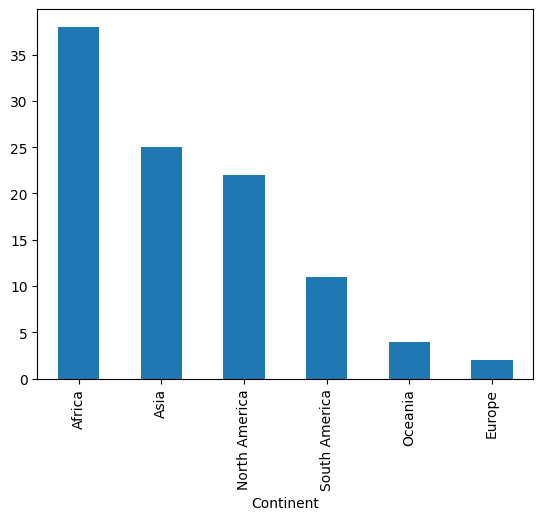

In [542]:
df["Continent"].value_counts().plot(kind="bar")

Africa has maximum countries which produce sugarcane

In [543]:
df.describe()

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


### Checking Outliers

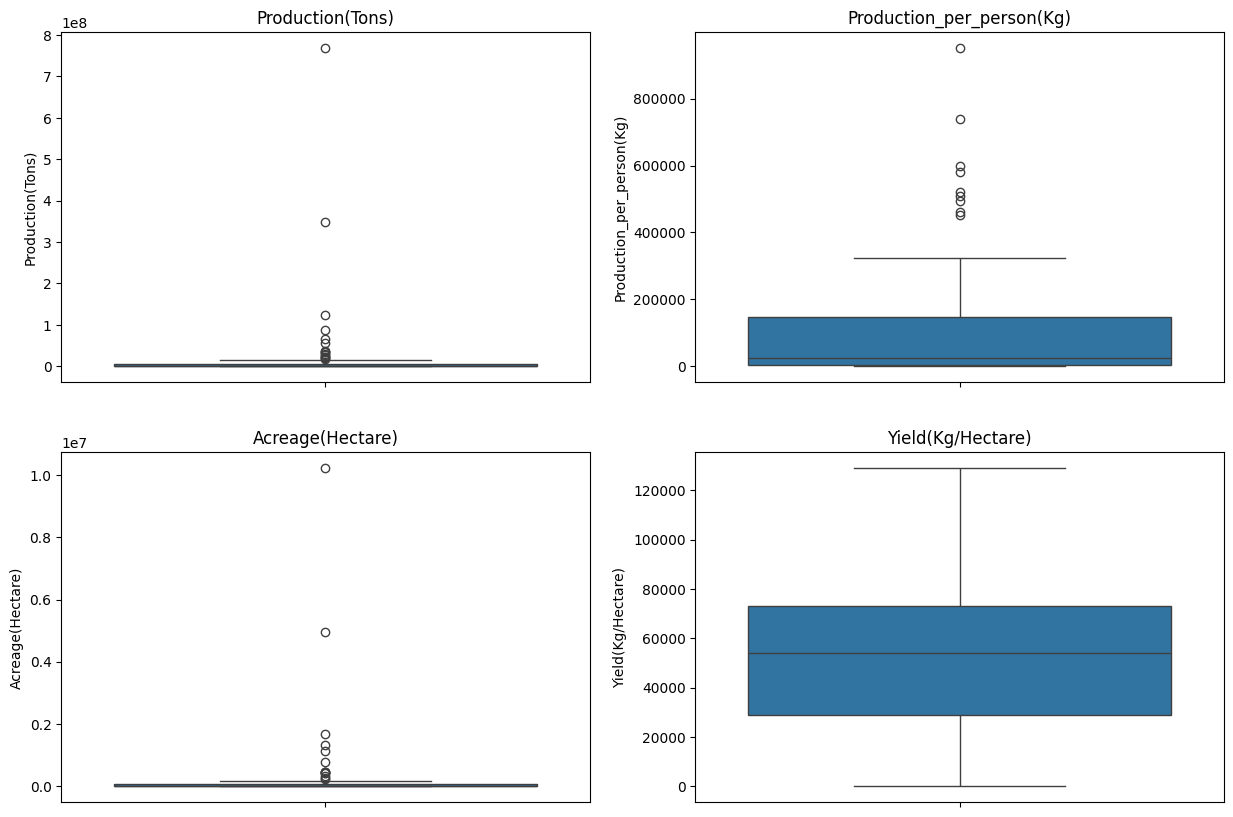

In [544]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
sns.boxplot(df["Production(Tons)"])
plt.title("Production(Tons)")
plt.subplot(2,2,2)
sns.boxplot(df["Production_per_person(Kg)"])
plt.title("Production_per_person(Kg)")
plt.subplot(2,2,3)
sns.boxplot(df["Acreage(Hectare)"])
plt.title("Acreage(Hectare)")
plt.subplot(2,2,4)
sns.boxplot(df["Yield(Kg/Hectare)"])
plt.title("Yield(Kg/Hectare)")
plt.show()

We have outliers in the data but outliers are required here as it shows the countries which has maximum production.

### Distribution of columns

C:\Users\DELL\AppData\Local\Temp\ipykernel_20560\1909675950.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production(Tons)"])
C:\Users\DELL\AppData\Local\Temp\ipykernel_20560\1909675950.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production_per_person(Kg)"])
C:\Users\DELL\A

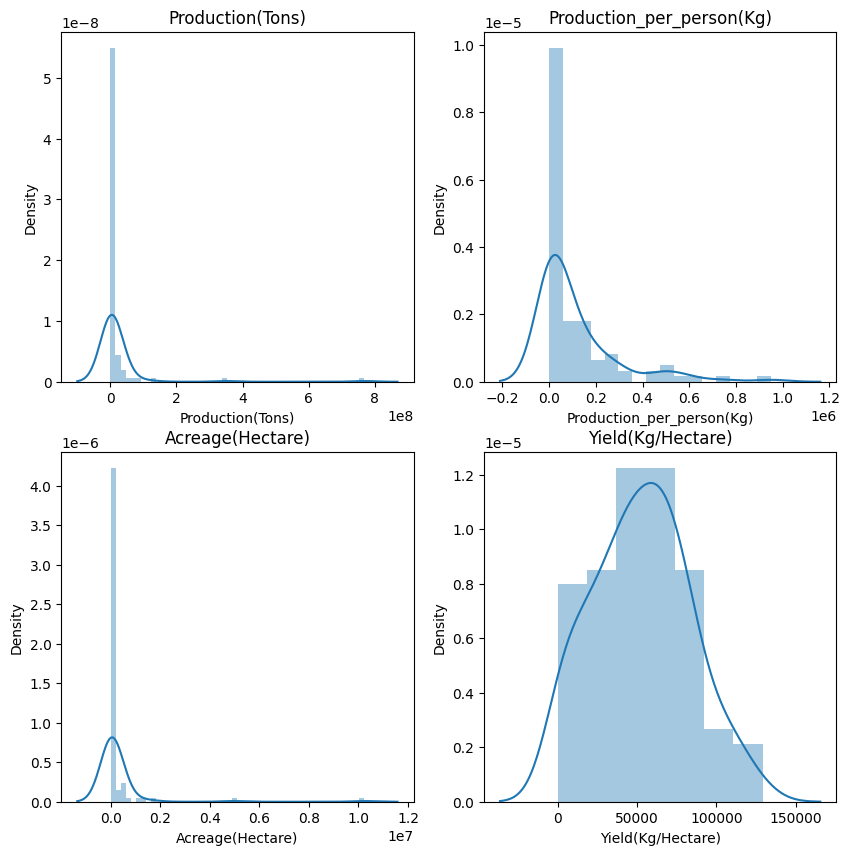

In [545]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.distplot(df["Production(Tons)"])
plt.title("Production(Tons)")
plt.subplot(2,2,2)
sns.distplot(df["Production_per_person(Kg)"])
plt.title("Production_per_person(Kg)")
plt.subplot(2,2,3)
sns.distplot(df["Acreage(Hectare)"])
plt.title("Acreage(Hectare)")
plt.subplot(2,2,4)
sns.distplot(df["Yield(Kg/Hectare)"])
plt.title("Yield(Kg/Hectare)")
plt.show()

<Axes: ylabel='Production(Tons)'>

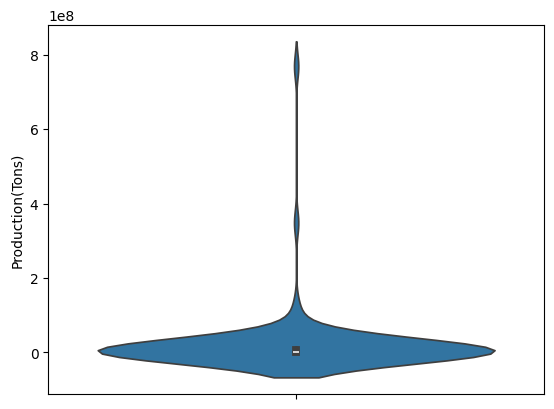

In [546]:
sns.violinplot(df["Production(Tons)"])

<font color="green" size=5><center><b>Bivariate Analysis</b></font>

In [547]:
df.sample(5)

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
91,Malaysia,Asia,5714.0,175.000,88.0,65223.8
76,Central African Republic,Africa,103002.0,21742.000,18466.0,5577.8
24,Nicaragua,North America,6815147.0,1084.393,7413.0,91935.1
57,Senegal,Africa,696992.0,44321.000,5902.0,118085.3
86,Benin,Africa,12017.0,1058.000,598.0,20095.3


### Which country produces maximum sugarcane?

In [548]:
df_new=df[["Country","Production(Tons)"]].set_index("Country")
df_new.sort_values("Production(Tons)",ascending=False)

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Lebanon,97.0
Singapore,50.0
Samoa,12.0


<Axes: ylabel='Production(Tons)'>

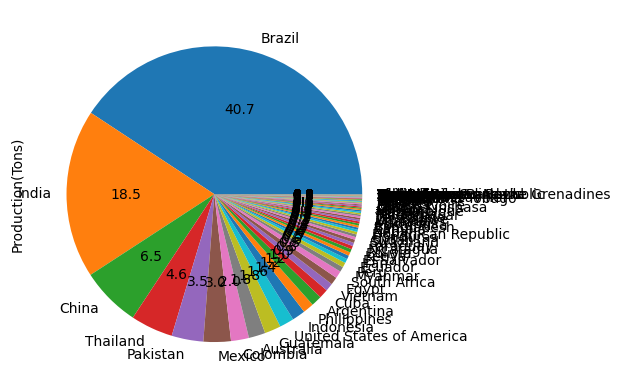

In [549]:
df_new["Production(Tons)"].plot(kind="pie",autopct="%.1f")

Brazil,india and China combinely produce 65% sugarcane of the world

<Axes: xlabel='Country'>

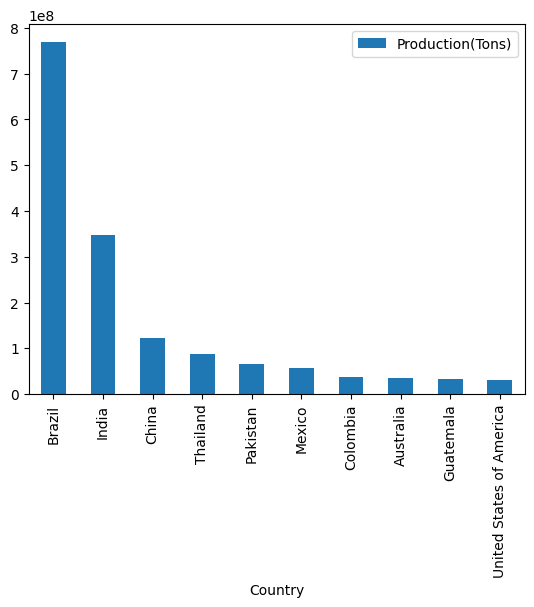

In [550]:
df_new.sort_values("Production(Tons)",ascending=False).head(10).plot(kind="bar")

Brazil produces maximum sugarcane out of all countries.

### Which country has highest land?

C:\Users\DELL\AppData\Local\Temp\ipykernel_20560\2973715568.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation =90)


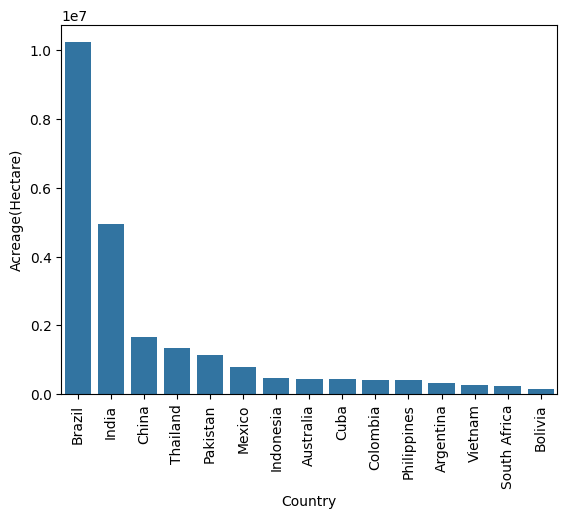

In [551]:
df_acr = df.sort_values("Acreage(Hectare)", ascending = False).head(15)
ax = sns.barplot(data = df_acr,  x= "Country", y = "Acreage(Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

### Wihch country has highest yield per hectare?

C:\Users\DELL\AppData\Local\Temp\ipykernel_20560\2860594357.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation =90)


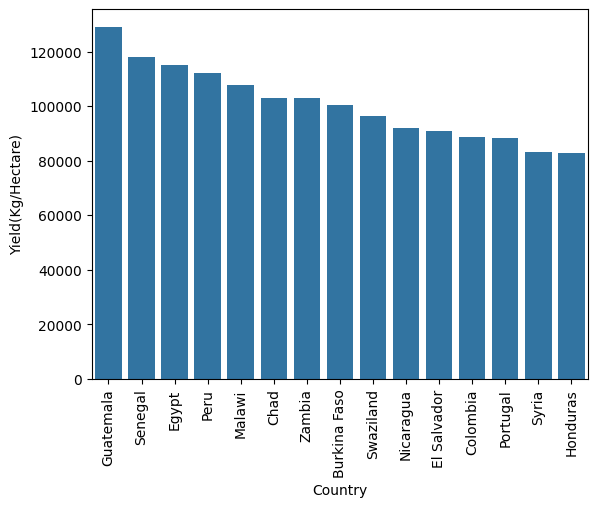

In [552]:
df_yield = df.sort_values("Yield(Kg/Hectare)", ascending = False).head(15)
ax = sns.barplot(data = df_yield,  x= "Country", y = "Yield(Kg/Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

### Which country has highest production?

C:\Users\DELL\AppData\Local\Temp\ipykernel_20560\328127327.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation =90)


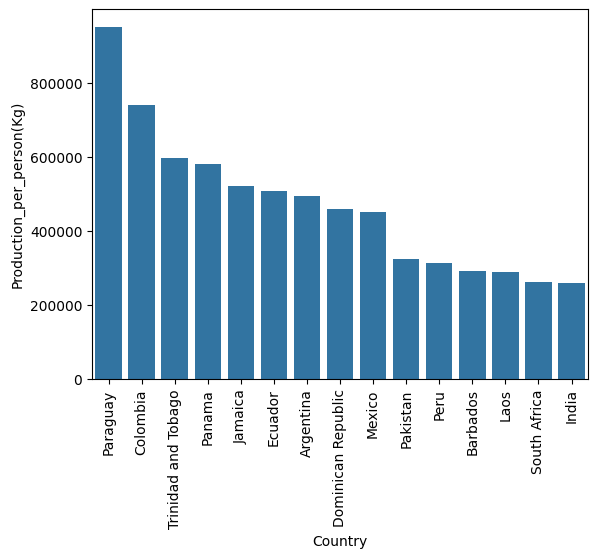

In [553]:
df_yield = df.sort_values("Production_per_person(Kg)", ascending = False).head(15)
ax = sns.barplot(data = df_yield,  x= "Country", y = "Production_per_person(Kg)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

### Do countries with highest land produce more sugarcane?

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

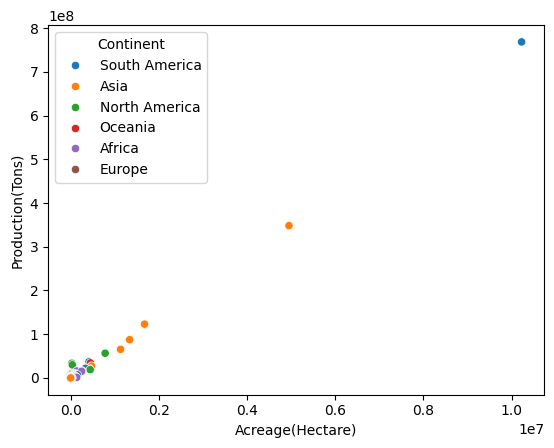

In [554]:
sns.scatterplot(data=df, x = "Acreage(Hectare)", y = "Production(Tons)", hue = "Continent" )

### Do countries which yield more sugarcane per hectare produces more sugarcane in total?

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

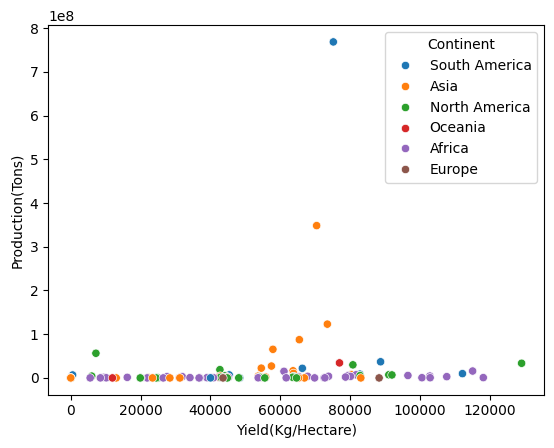

In [555]:
sns.scatterplot(data = df, x = "Yield(Kg/Hectare)" , y = "Production(Tons)", hue = "Continent")

### Correlation

In [556]:
df.corr(numeric_only=True)

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.015000,0.997550,0.132812
Production_per_person(Kg),0.015000,1.000000,0.012557,0.017999
Acreage(Hectare),0.997550,0.012557,1.000000,0.113433
Yield(Kg/Hectare),0.132812,0.017999,0.113433,1.000000


<Axes: >

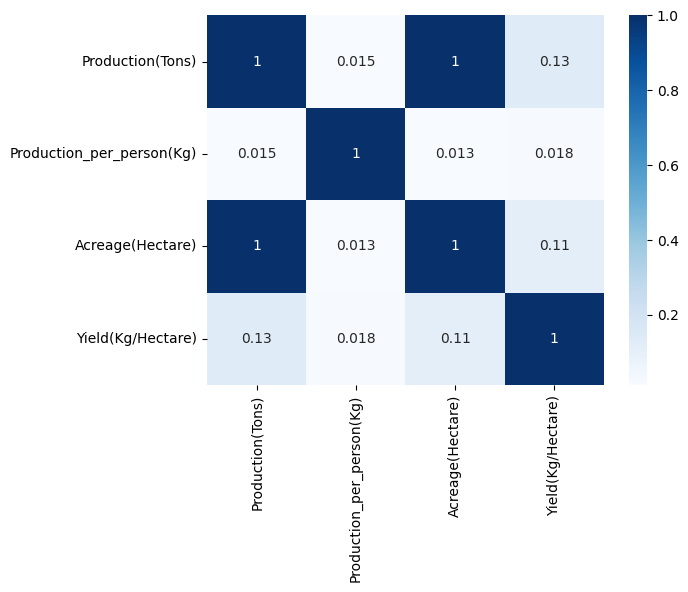

In [557]:
sns.heatmap(df.corr(numeric_only=True), annot = True, cmap="Blues")

### Analysis for continent

In [560]:
df_continent=df.groupby("Continent").sum()
df_continent["number_of_countries"]=df.groupby("Continent").count()["Country"]
df_continent

,Country,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1,4
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7,11


### Which continent produces maximum sugarcane?

<Axes: xlabel='Continent'>

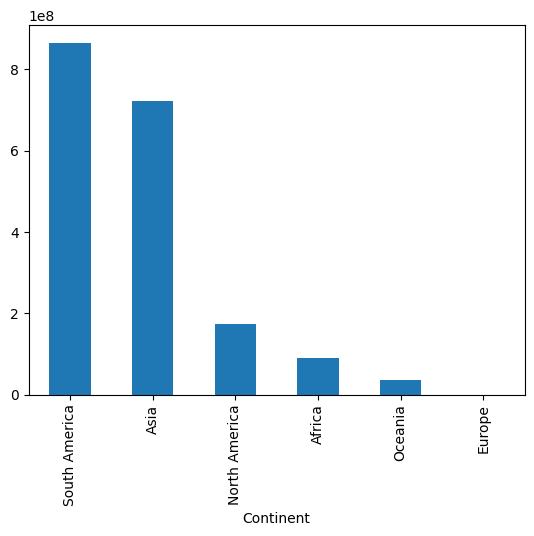

In [565]:
df_continent["Production(Tons)"].sort_values(ascending=False).plot(kind="bar")

### Do number of countries in a Continent effects production of sugarcane?

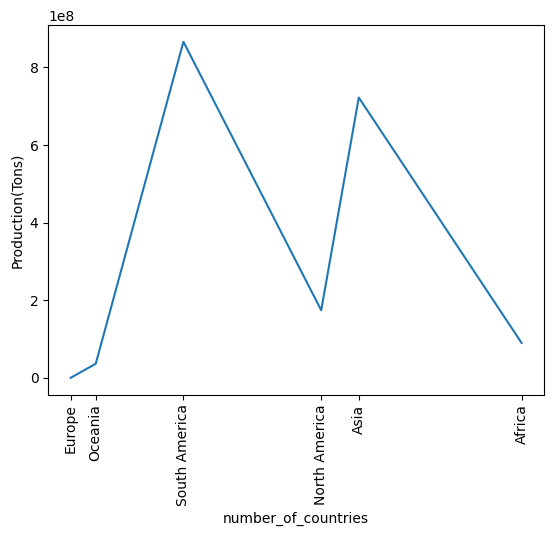

In [566]:
continent_names = df_continent.index.to_list()
sns.lineplot(data = df_continent,x = "number_of_countries", y= "Production(Tons)" )
plt.xticks(df_continent["number_of_countries"], continent_names, rotation =90)
plt.show()

### Do continent with highest land produces more sugarcane?

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

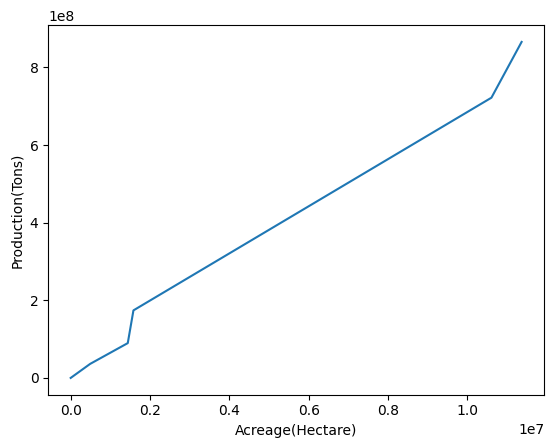

In [567]:
sns.lineplot(data = df_continent,x = "Acreage(Hectare)", y= "Production(Tons)" )

### Production distribution by continent

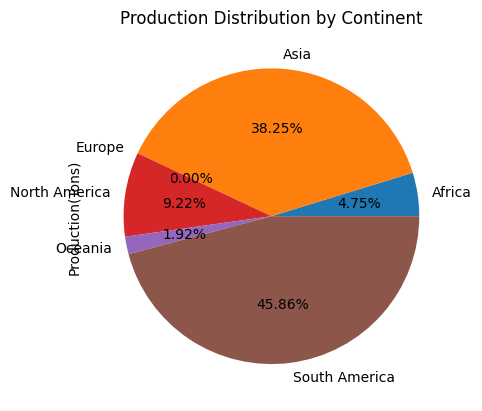

In [568]:
df_continent["Production(Tons)"].plot(kind = "pie", autopct = "%.2f%%")
plt.title('Production Distribution by Continent')
plt.show()

### Correlation of continent

In [570]:
df_continent.corr(numeric_only=True)

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Production(Tons),1.000000,0.522211,0.994897,0.091201,0.109244
Production_per_person(Kg),0.522211,1.000000,0.463215,0.542961,0.540086
Acreage(Hectare),0.994897,0.463215,1.000000,0.111166,0.132817
Yield(Kg/Hectare),0.091201,0.542961,0.111166,1.000000,0.989712
number_of_countries,0.109244,0.540086,0.132817,0.989712,1.000000
